In [35]:
import pandas as p
import numpy as np
from sga import safe
from sga.toolbox.c_impl import safe as csafe

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
s = safe.Safe('/home/matej/GeneralizedSAFE/generalize_SAFE_network.csv',
     '/home/matej/GeneralizedSAFE/generalize_SAFE_annotations.csv',
#      '/home/matej/GeneralizedSAFE/generalize_SAFE_neighbors.csv'
)

In [3]:
s.prepare_attributes()

In [33]:
cenr = s.calculate()

In [5]:
penr = s.calculate(force_python_impl=True)

In [14]:
(cenr - penr).max().max(), (cenr - penr).min().min()

(0.31311467937426252, -0.27427161654353915)

In [36]:
diff = (cenr - penr)

/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


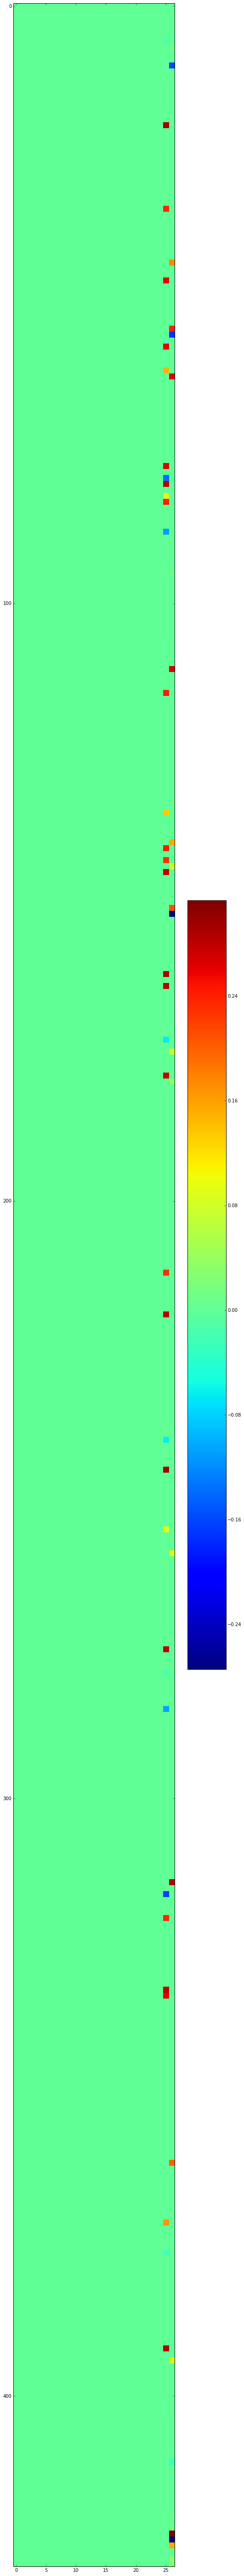

In [54]:
gcf().set_size_inches((10,100))
imshow(diff[diff.any(axis='columns')], interpolation='nearest')
colorbar()

In [64]:
diff[diff.abs() >= 0.0001].stack()

node                 
YAR002C-A  GO:0006888   -0.008805
YAR019C    GO:0043161    0.008188
YBL041W    GO:0043161   -0.159579
YBR080C    GO:0006888    0.294588
YBR254C    GO:0006888    0.235631
YDL020C    GO:0043161    0.173976
YDL058W    GO:0006888    0.261010
YDL097C    GO:0043161    0.238623
           GO:0043161   -0.173208
YDL100C    GO:0006888   -0.008805
YDL115C    GO:0006888    0.261010
YDL145C    GO:0006888    0.147065
YDL147W    GO:0043161    0.265639
           GO:0043161    0.002628
YDR137W    GO:0006888    0.000466
YDR189W    GO:0006888    0.265391
YDR202C    GO:0006888   -0.134960
YDR203W    GO:0006888    0.281151
YDR238C    GO:0006888    0.090097
           GO:0006888    0.242687
YDR320C    GO:0006888   -0.107916
YDR394W    GO:0043161    0.007274
YEL042W    GO:0006888   -0.000677
YER084W    GO:0006888   -0.002838
YER094C    GO:0043161    0.269112
YER157W    GO:0006888    0.242687
YFL039C    GO:0006888    0.133034
YFR050C    GO:0043161    0.153707
YFR051C    GO:0006888    0

In [46]:
enrichment = np.zeros((len(s.network.index), len(s.attributes.columns)))

cdata = s.network.iloc[:,2].apply(lambda x: s.attributes.ix[set(x)].sum())
cdata['len'] = s.network.iloc[:,2].apply(len)
cdata = cdata.astype(np.uint32)

Fj = s.attributes.sum().astype(np.uint32)

In [20]:
csafe(cdata, enrichment, Fj)

In [21]:
enrichmentDF = p.DataFrame(enrichment, index=s.network.index, columns=s.attributes.columns)

In [43]:
enrichmentDF_c = enrichmentDF.copy()